<b>Multivariable-Linear-Regression (MLR) - Scratch</b> <br>
<i>Implementing MLR using only NumPy, step-by-step. </i>

<b>requirements</b>

In [9]:
# example:- pip install numpy

<b>imports</b>

In [10]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

<b>(1) DATA PRE-PROCESSING</b>

In [11]:
# Read Raw Dataset 
dataset = load_diabetes()

# Feature-Matrix (X) & Dependent-Variable(y)
X = dataset.data
y = dataset.target

# Data-Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Custom Dataset :-
# X, y = datasets.make_regression(n_samples=150, n_features=1, noise=20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=24)

# Data Pre-Processing
# Normalize (if needed)
# Data Visualization

<b>(2) ML ALGORITHM - SCRATCH</b>

In [12]:
class MultivariableLinearRegression: 
    
    # (2.1) Initialize Model-Parameters 
    def __init__(self, lr=0.001, iters=10000) -> None:
        """
        Initializes the MLR-model's parameters and Hyper-parameters.
        
        Parameters: 
            weights : (np.array) weight-vector of model, Instance-Var so (value stays same for a specific instance)    
            bias    : (float) bias-term o the model, Instance-Var so (value stays same for a specific instance)              
            lr      : (float) Learning-Rate, [Hyper-Parameter]
            iters   : (int) Total number of Iterations for traininig the whole Dataset, [Hyper-Parameter]
                    
        Returns:     
            None
        """
        
        # Model-Parametes
        self.weights = None
        self.bias = None
       
        # Hyper-Parameter
        self.lr = lr 
        self.iters = iters
        
        
    # (2.2) Making-Predictions
    def predict(self, X):
        """
         For given Features(x)[x1,x2,x3...,xn], predicts the output(ŷ)/y_pred is np array. 
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
        
        Returns : 
            The predited output(ŷ)/y_pred as np array.
        """
        
        # ŷ = wx + b   
        y_pred = np.dot(X, self.weights) + self.bias # dot product need no for-loop
        return y_pred


    # (2.3) Cost-Function
    def mean_square_error(self, y_act, y_pred) -> np.ndarray:
        """   
        Predicts the error score between real(y) and predicted values(ŷ), using MSE
        
        Parameters:
            y-act  : (np.array) Actual values
            y_pred :  (np.array) Predited values
        
        Returns: 
            The loss-score mse as an int in np array
        """

        mse = None
        mse = np.mean((y_act - y_pred)**2)
        return mse


    # (2.4) Fit Model to Data (Learning-&-Training)  
    def fit(self, X, y):
        """
        Learns the model-Params (w & b) using GD algo and Trains the model with iters
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
            y : (np.array) Dependent-Variable
        """
        
        # Initialize Model-Parameters
        n_data, n_features = X.shape
        
        # Initialize With zero val or random Values 
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Create empty list to Store all Costs & Weights
        cost_history = []
        weight_history = []
        
        # Training Model  
        for i in range(self.iters):                 
            # ŷ = wx + b   
            y_pred = self.predict(X)
            
            # Learning : Gradient-Descent / Back-prop Algo
            # Deriv of Cost-Func (J) w.r.t weights(w)
            dj_dw = (-2/n_data) * np.dot(X.T, (y- y_pred))
            
            # Deriv of Cost-Func (J) w.r.t bias(b)
            dj_db = (-2/n_data) * np.sum(y-y_pred)

            # Back-Prop Algo
            self.weights -= self.lr * dj_dw
            self.bias -= self.lr * dj_db
            
            cost = self.mean_square_error(y,y_pred)
            
            cost_history.append(cost)
            weight_history.append(self.weights.copy())
            
            if i % 1000 == 0:
                print(f"iter={i} weight={self.weights} bias={self.bias} cost={cost}")               
                
        return y_pred, self.weights, self.bias, cost_history, weight_history     

<b>(3) MODEL TRAINING</b>

In [13]:
# Creating object of Type MultiVariableLinearRegression
regressor = MultivariableLinearRegression(0.1,10000)

# Training The SLR model with the Training-Datasets
y_train_pred, weights, bias, cost_history, weight_history = regressor.fit(X_train,y_train)

iter=0 weight=[ 0.17302464  0.01482569  0.54412657  0.37443697  0.18840335  0.1517899
 -0.31599909  0.37372893  0.45185176  0.38271414] bias=30.78058252427185 cost=29834.388349514564
iter=1000 weight=[  56.94106473  -46.9306973   276.57256477  196.37564615   21.72946067
    5.7769351  -158.11023387  141.04507323  207.85007081  131.28272655] bias=151.66799882570135 cost=3499.7795297842977
iter=2000 weight=[  57.40755802 -110.52138562  393.34858493  271.8883099   -17.93175141
  -41.64474128 -203.73852757  154.93401884  270.93742863  143.66111027] bias=151.1624300923474 cost=3146.9526129957603
iter=3000 weight=[  51.12085122 -158.50033931  457.12153314  310.57471596  -48.74870903
  -75.0489711  -222.03829458  153.29593621  300.1419017   133.64100985] bias=151.00493033591403 cost=3031.741648820785
iter=4000 weight=[  45.66127717 -191.38619953  495.64761891  333.26155871  -68.1623687
  -93.77807451 -230.96879349  151.86046035  317.3560413   119.83369176] bias=150.9405441902934 cost=2986.841

<b>(4) PREDICTION</b>

In [14]:
# Predicting on Test-Set using the trained SLR model (by the learned 'weights & bias')
y_pred = regressor.predict(X_test)

<b>(5) EVALUATION-VISUALIZATION</b>

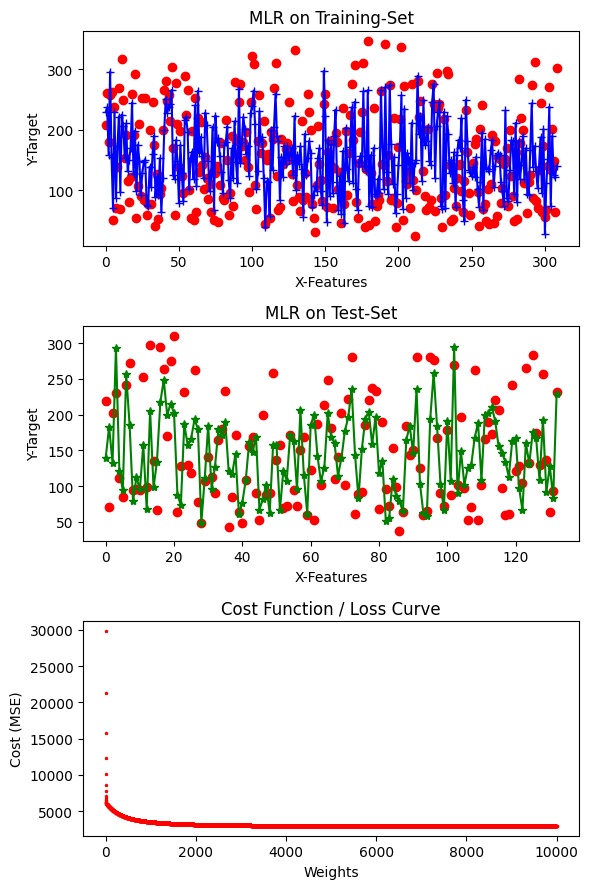

In [15]:
# Multiple-Plots on Single-Figure 
fig, ax = plt.subplots(3, 1, figsize=(6, 9))

# Training-Set plot (X_train Vs y_train_pred)
Xpts = np.arange(0, X_train.shape[0]) # Convert Multi-D X_train to 1D pts

ax[0].scatter(Xpts, y_train, color='red')
ax[0].plot(Xpts, y_train_pred, color='blue', marker = '+')
ax[0].set_title("MLR on Training-Set")
ax[0].set_xlabel('X-Features')
ax[0].set_ylabel('Y-Target')

# Test-Set plot (X_test Vs y_pred)
Xpts = np.arange(0, X_test.shape[0]) # Convert Multi-D X_test to 1D pts

ax[1].scatter(Xpts, y_test, color='red')
ax[1].plot(Xpts, y_pred, color='green', marker = "*")
ax[1].set_title("MLR on Test-Set")
ax[1].set_xlabel('X-Features')
ax[1].set_ylabel('Y-Target')

# Cost-Function / loss-Curve plot (MSE score Vs Weights)
weight_history = np.array(weight_history) # Convert Multi-D weights to 1D pts

wpts = np.arange(0, weight_history.shape[0])
ax[2].scatter(wpts, cost_history, color='red', s=3, marker='*')
ax[2].set_title("Cost Function / Loss Curve")
ax[2].set_xlabel('Weights')
ax[2].set_ylabel('Cost (MSE)')

# Adjust the layout to prevent overlapping
plt.tight_layout()

####### Show all plots in one figure #########
plt.show()




<b>CONCLUSION</b>
- The model performs well on linear data with multiple features